# Project:-US Home Prices: Supply-Demand Dynamics

In [1]:
#importing useable libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV files into dataframes
df1 = pd.read_csv('SUPPLY1.csv')
df2 = pd.read_csv('HOME_LLC DATA.csv')

In [3]:
df1

,DATE,PERMIT,MSACSR,TLMFGCONS
0,01-01-2003,1808,4.0,19703
1,01-02-2003,1854,4.5,19817
2,01-03-2003,1757,4.1,20772
3,01-04-2003,1803,4.1,20655
4,01-05-2003,1835,3.9,22157
...,...,...,...,...
236,01-09-2022,1588,9.7,122877
237,01-10-2022,1555,9.7,120839
238,01-11-2022,1402,9.4,131816
239,01-12-2022,1409,8.5,133244


In [4]:
df2

,DATE,UMCSENT,GDP,MSPUS,FEDFUNDS,CSUSHPINSA
0,01-01-2003,82.4,11174.129,186000.0,1.24,127.652
1,01-02-2003,79.9,11312.766,191800.0,1.26,128.326
2,01-03-2003,77.6,11566.669,191900.0,1.25,129.308
3,01-04-2003,86.0,11772.234,198800.0,1.26,130.488
4,01-05-2003,92.1,11923.447,212700.0,1.26,131.839
...,...,...,...,...,...,...
236,01-09-2022,58.6,NaN,NaN,2.56,300.503
237,01-10-2022,59.9,NaN,NaN,3.08,298.731
238,01-11-2022,56.7,NaN,NaN,3.78,296.928
239,01-12-2022,59.8,NaN,NaN,4.10,294.417


In [5]:
# Merge both supply and demand dynamics dataframes
merged_df = pd.merge(df1, df2, on='DATE')

In [6]:
merged_df

,DATE,PERMIT,MSACSR,TLMFGCONS,UMCSENT,GDP,MSPUS,FEDFUNDS,CSUSHPINSA
0,01-01-2003,1808,4.0,19703,82.4,11174.129,186000.0,1.24,127.652
1,01-02-2003,1854,4.5,19817,79.9,11312.766,191800.0,1.26,128.326
2,01-03-2003,1757,4.1,20772,77.6,11566.669,191900.0,1.25,129.308
3,01-04-2003,1803,4.1,20655,86.0,11772.234,198800.0,1.26,130.488
4,01-05-2003,1835,3.9,22157,92.1,11923.447,212700.0,1.26,131.839
...,...,...,...,...,...,...,...,...,...
236,01-09-2022,1588,9.7,122877,58.6,NaN,NaN,2.56,300.503
237,01-10-2022,1555,9.7,120839,59.9,NaN,NaN,3.08,298.731
238,01-11-2022,1402,9.4,131816,56.7,NaN,NaN,3.78,296.928
239,01-12-2022,1409,8.5,133244,59.8,NaN,NaN,4.10,294.417


In [7]:
df = merged_df
df

,DATE,PERMIT,MSACSR,TLMFGCONS,UMCSENT,GDP,MSPUS,FEDFUNDS,CSUSHPINSA
0,01-01-2003,1808,4.0,19703,82.4,11174.129,186000.0,1.24,127.652
1,01-02-2003,1854,4.5,19817,79.9,11312.766,191800.0,1.26,128.326
2,01-03-2003,1757,4.1,20772,77.6,11566.669,191900.0,1.25,129.308
3,01-04-2003,1803,4.1,20655,86.0,11772.234,198800.0,1.26,130.488
4,01-05-2003,1835,3.9,22157,92.1,11923.447,212700.0,1.26,131.839
...,...,...,...,...,...,...,...,...,...
236,01-09-2022,1588,9.7,122877,58.6,NaN,NaN,2.56,300.503
237,01-10-2022,1555,9.7,120839,59.9,NaN,NaN,3.08,298.731
238,01-11-2022,1402,9.4,131816,56.7,NaN,NaN,3.78,296.928
239,01-12-2022,1409,8.5,133244,59.8,NaN,NaN,4.10,294.417


#  EDA: Exploratory Data Analysis

In [8]:
#Checking the dimensions of the dataset
df.shape
print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset:\n {df.columns.to_list()}")

The rows and columns in the dataset: (241, 9)

The column headers in the dataset:
 ['DATE', 'PERMIT', 'MSACSR', 'TLMFGCONS', 'UMCSENT', 'GDP', 'MSPUS', 'FEDFUNDS', 'CSUSHPINSA']


In [9]:
# checking the types of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        241 non-null    object 
 1   PERMIT      241 non-null    int64  
 2   MSACSR      241 non-null    float64
 3   TLMFGCONS   241 non-null    int64  
 4   UMCSENT     241 non-null    float64
 5   GDP         81 non-null     float64
 6   MSPUS       81 non-null     float64
 7   FEDFUNDS    241 non-null    float64
 8   CSUSHPINSA  241 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 17.1+ KB
None


In [10]:
# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: \n {categorical_col}\n")
print(f"Numerical Columns: \n {numerical_col}")

Categorical Columns: 
 ['DATE']

Numerical Columns: 
 ['PERMIT', 'MSACSR', 'TLMFGCONS', 'UMCSENT', 'GDP', 'MSPUS', 'FEDFUNDS', 'CSUSHPINSA']


# Missing Values

In [11]:
#checking the null values in the training dataset
missing_val = df.isnull().sum().to_frame("Missing in df")
missing_val

,Missing in df
DATE,0
PERMIT,0
MSACSR,0
TLMFGCONS,0
UMCSENT,0
GDP,160
MSPUS,160
FEDFUNDS,0
CSUSHPINSA,0


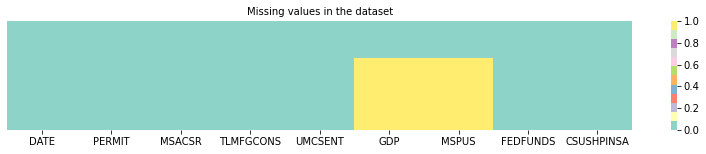

In [12]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);

In [13]:
#check missing percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head()

GDP       66.390041
MSPUS     66.390041
DATE       0.000000
PERMIT     0.000000
MSACSR     0.000000
dtype: float64

In [14]:
# Filling missing values in the GDP column using linear interpolation
df["GDP"] = df["GDP"].interpolate()

In [15]:
#check missing percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

MSPUS         66.390041
DATE           0.000000
PERMIT         0.000000
MSACSR         0.000000
TLMFGCONS      0.000000
UMCSENT        0.000000
GDP            0.000000
FEDFUNDS       0.000000
CSUSHPINSA     0.000000
dtype: float64

In [16]:
# Filling missing values in the MSPUS column using linear interpolation
df["MSPUS"] = df["MSPUS"].interpolate()

In [17]:
df.isna().sum()

DATE          0
PERMIT        0
MSACSR        0
TLMFGCONS     0
UMCSENT       0
GDP           0
MSPUS         0
FEDFUNDS      0
CSUSHPINSA    0
dtype: int64

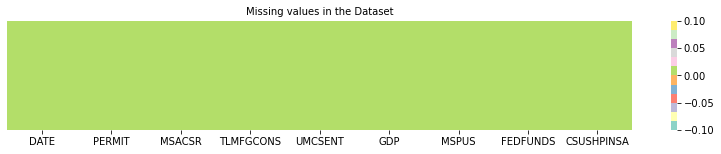

In [18]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the Dataset', fontsize=10);

# Features Analysis

# Unique values
Now, we are going to review the unique values of each column in the dataset in order to understand the data and the features.

In [19]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['Type'] = df.dtypes.values
info_df

,No. of Unique values,Type
DATE,241,object
PERMIT,227,int64
MSACSR,71,float64
TLMFGCONS,241,int64
UMCSENT,187,float64
GDP,81,float64
MSPUS,80,float64
FEDFUNDS,111,float64
CSUSHPINSA,241,float64


In [20]:
# Checking for columns with one unique value or have the same unique values as rows has the dataset
info_df[(info_df['No. of Unique values'] == 1) | (info_df['No. of Unique values'] == df.shape[0]) ]

,No. of Unique values,Type
DATE,241,object
TLMFGCONS,241,int64
CSUSHPINSA,241,float64


In [21]:
df.CSUSHPINSA.unique()

array([127.652, 128.326, 129.308, 130.488, 131.839, 133.225, 134.647,
       135.966, 137.076, 137.975, 138.765, 139.627, 140.705, 142.029,
       144.08 , 146.18 , 148.335, 150.518, 152.337, 153.814, 155.108,
       156.298, 157.496, 158.67 , 160.13 , 161.924, 164.576, 166.999,
       169.544, 172.015, 174.098, 175.923, 177.611, 178.752, 179.673,
       180.107, 180.828, 181.5  , 182.749, 183.648, 184.38 , 184.547,
       184.608, 184.405, 184.198, 184.054, 183.631, 183.229, 182.718,
       182.471, 182.194, 182.131, 181.884, 181.54 , 180.993, 180.234,
       179.122, 177.53 , 175.162, 173.338, 171.077, 169.191, 167.904,
       167.324, 167.021, 166.537, 165.713, 164.277, 161.912, 159.163,
       156.072, 152.545, 149.363, 147.618, 146.515, 146.943, 148.169,
       149.797, 150.749, 150.669, 149.628, 148.585, 147.939, 146.664,
       145.003, 143.053, 143.597, 145.404, 147.04 , 147.706, 147.566,
       146.431, 144.612, 143.133, 141.823, 140.632, 139.04 , 137.735,
       137.788, 139.

In [22]:
# Checking the target variable
df['CSUSHPINSA'].value_counts().to_frame()

,count
CSUSHPINSA,
127.652,1
145.163,1
175.051,1
175.143,1
175.117,1
...,...
143.053,1
143.597,1
145.404,1


In [23]:
#defining a fuction for percentage in each bar in a countplot
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

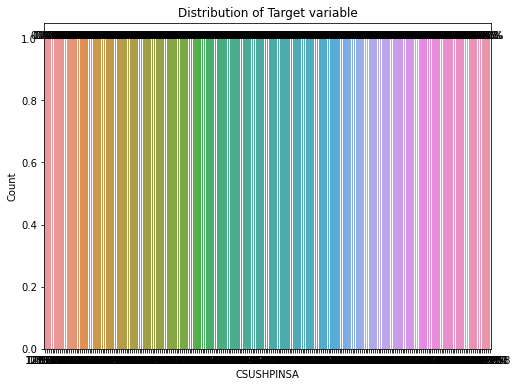

In [24]:
# Visualize the distribution of target
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='CSUSHPINSA')
show_percentage(ax, len(df))
plt.title('Distribution of Target variable')
plt.xlabel('CSUSHPINSA')
plt.ylabel('Count')
plt.show()

In [25]:
# Display basic Statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
            PERMIT      MSACSR      TLMFGCONS     UMCSENT           GDP   
count   241.000000  241.000000     241.000000  241.000000    241.000000  \
mean   1309.535270    6.146058   58409.941909   82.296266  23642.166793   
std     478.888896    1.952241   25029.210523   12.644193   5014.171112   
min     513.000000    3.300000   19703.000000   50.000000  11174.129000   
25%     980.000000    4.800000   37489.000000   73.200000  20037.088000   
50%    1291.000000    5.600000   54884.000000   84.100000  26813.601000   
75%    1680.000000    7.200000   76622.000000   93.200000  26813.601000   
max    2263.000000   12.200000  164649.000000  103.800000  26813.601000   

               MSPUS    FEDFUNDS  CSUSHPINSA  
count     241.000000  241.000000  241.000000  
mean   379260.165975    1.314191  181.126095  
std     80276.735878    1.587253   41.864691  
min    186000.000000    0.050000  127.652000  
25%    318400.000000    0.120000  148.169000  
50%    429000.000000    

# Categorical variables unique values


In [26]:
# Separating Numerical and Categorical columns
num_cat_col = ['PERMIT', 'MSACSR', 'TLMFGCONS', 'UMCSENT', 'GDP', 'MSPUS', 'FEDFUNDS', 'CSUSHPINSA']
print(f"Numerical Columns that represent a category:\n {num_cat_col}\n")

Numerical Columns that represent a category:
 ['PERMIT', 'MSACSR', 'TLMFGCONS', 'UMCSENT', 'GDP', 'MSPUS', 'FEDFUNDS', 'CSUSHPINSA']



In [27]:
# Visualize box plots for numeric colu mns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col != 'CSUSHPINSA']
print(numeric_columns)

['PERMIT', 'MSACSR', 'TLMFGCONS', 'UMCSENT', 'GDP', 'MSPUS', 'FEDFUNDS']


In [28]:
#Defining The function ,performing EDA,Displaying Basic statistics,Outliers Imputations and Visulaizations

def perform_eda_with_boxplots(df, outlier_threshold=1.5, impute_outliers=True):
    """
    Perform EDA with box plots, and optionally handle outliers by imputing them.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - outlier_threshold (float): The threshold to identify outliers. Default is 1.5.
    - impute_outliers (bool): Whether to impute outliers. Default is True.
    """
    # Display basic
    print("Basic Statistics:")
    print(df.describe())

    # Display information about data types and missing values
    print("\nData Types and Missing Values:")
    print(df.info())

    # Visualize box plots for numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    numeric_columns = [col for col in numeric_columns if col != 'CSUSHPINSA']
    print(numeric_columns)
    
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column} (Before Outlier Imputation)')
        plt.show()
   
    #imputing outliers
    for column in numeric_columns:
        if impute_outliers:
            # Identify and impute outliers
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - outlier_threshold * iqr
            upper_bound = q3 + outlier_threshold * iqr

            # Impute outliers with median
            df[column] = df[column].apply(lambda x: x if lower_bound <= x <= upper_bound else df[column].median())

    # Visualize updated box plots after outlier imputation

Basic Statistics:
            PERMIT      MSACSR      TLMFGCONS     UMCSENT           GDP   
count   241.000000  241.000000     241.000000  241.000000    241.000000  \
mean   1309.535270    6.146058   58409.941909   82.296266  23642.166793   
std     478.888896    1.952241   25029.210523   12.644193   5014.171112   
min     513.000000    3.300000   19703.000000   50.000000  11174.129000   
25%     980.000000    4.800000   37489.000000   73.200000  20037.088000   
50%    1291.000000    5.600000   54884.000000   84.100000  26813.601000   
75%    1680.000000    7.200000   76622.000000   93.200000  26813.601000   
max    2263.000000   12.200000  164649.000000  103.800000  26813.601000   

               MSPUS    FEDFUNDS  CSUSHPINSA  
count     241.000000  241.000000  241.000000  
mean   379260.165975    1.314191  181.126095  
std     80276.735878    1.587253   41.864691  
min    186000.000000    0.050000  127.652000  
25%    318400.000000    0.120000  148.169000  
50%    429000.000000    

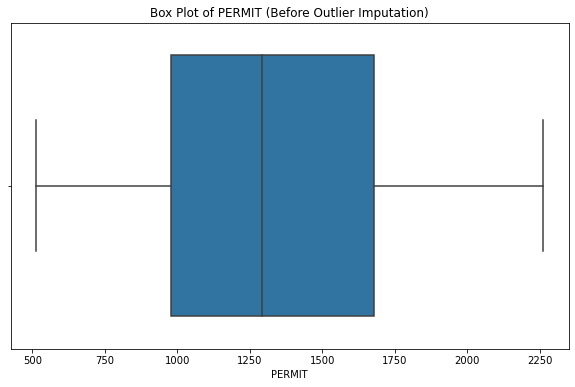

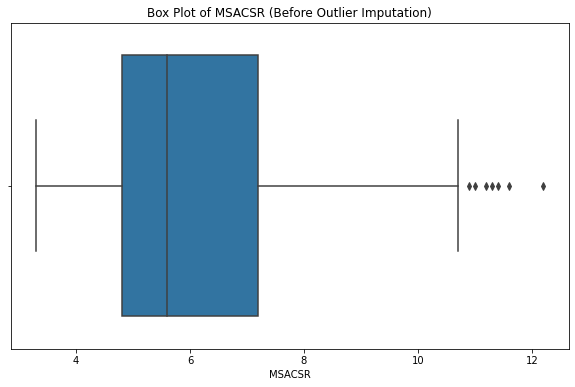

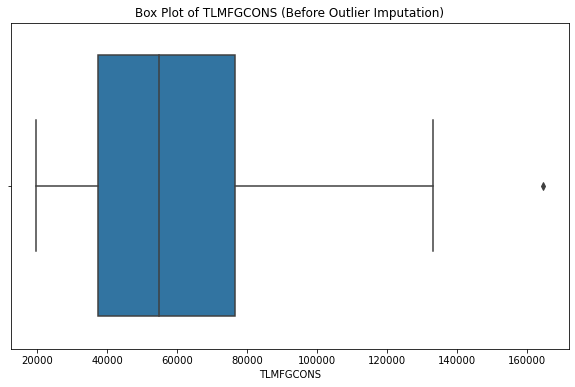

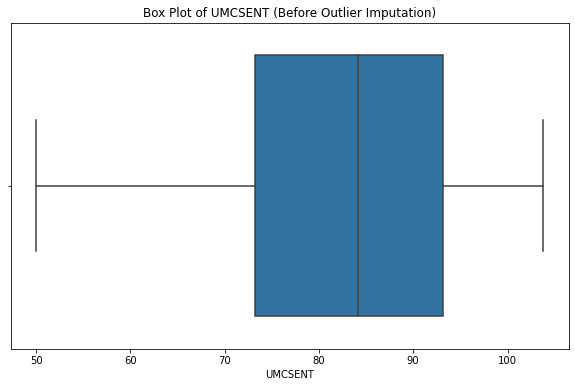

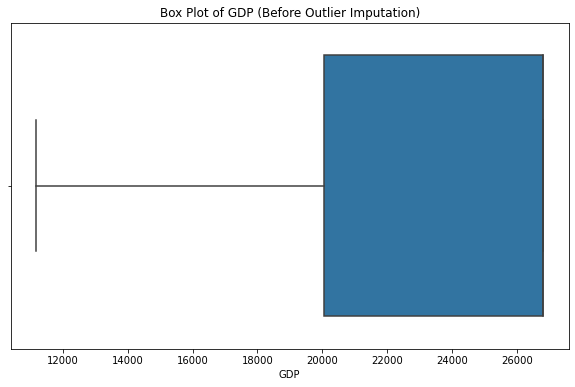

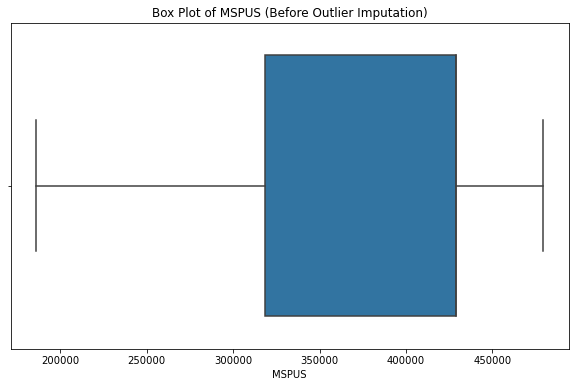

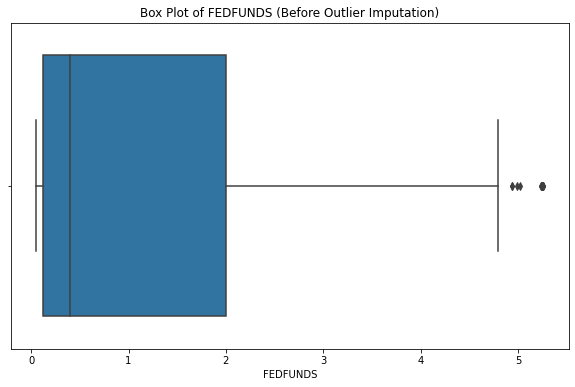

In [29]:
#DATA Analysis before Outlier Imputation
perform_eda_with_boxplots(df, outlier_threshold=1.5, impute_outliers=True)

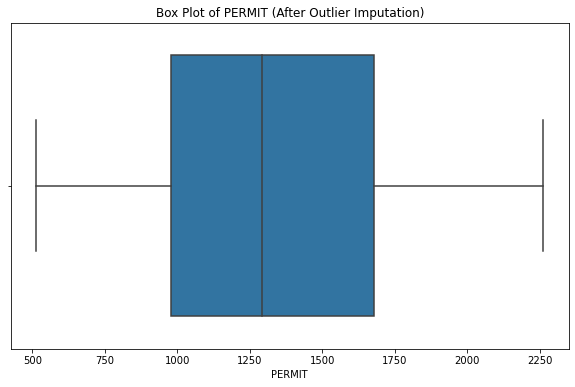

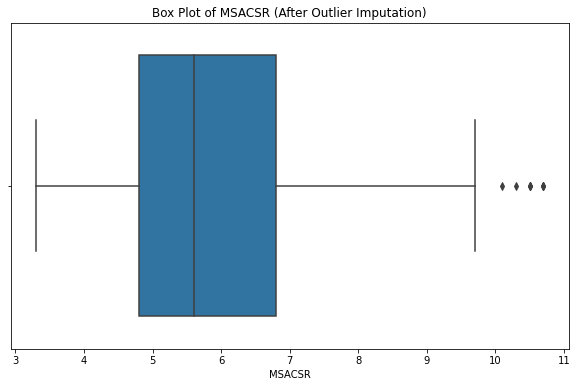

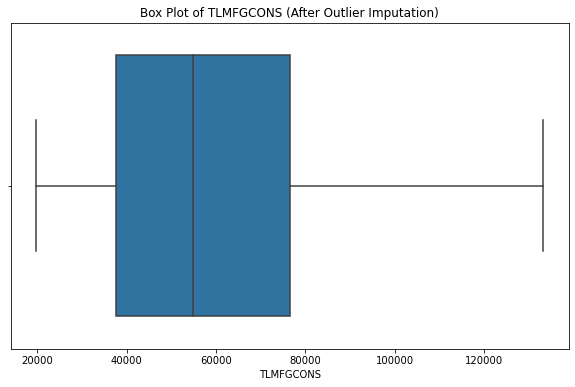

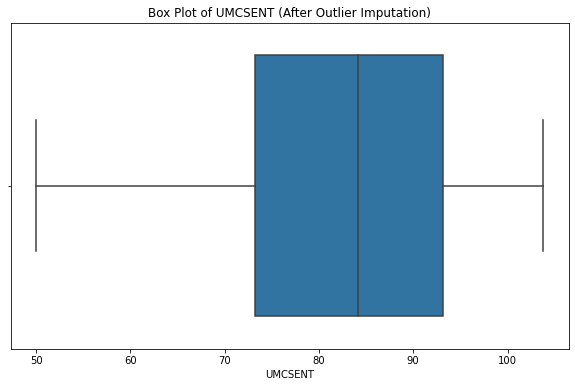

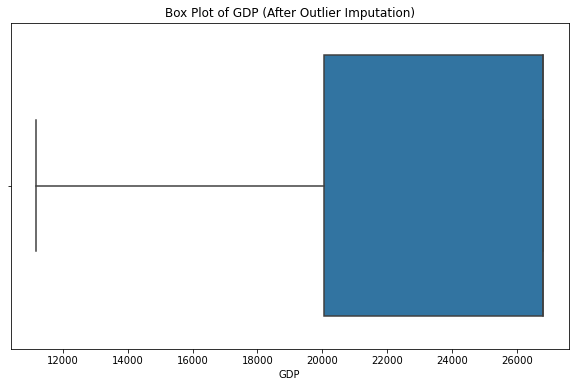

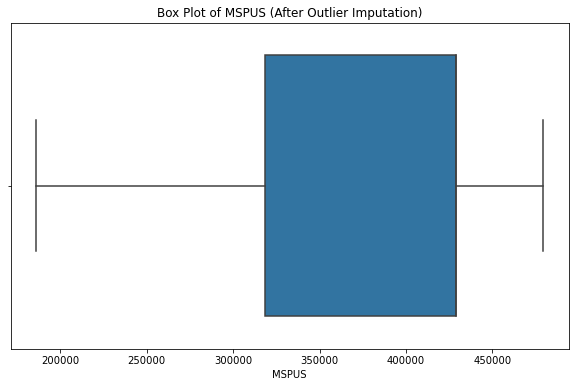

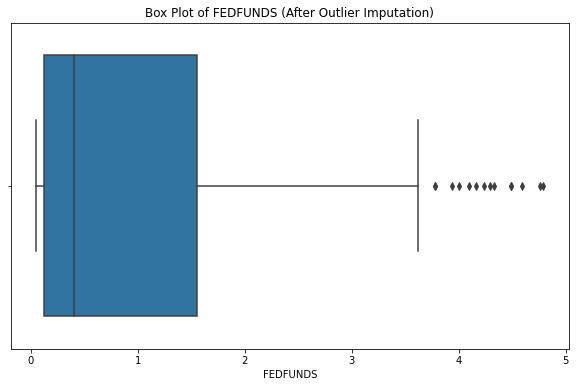

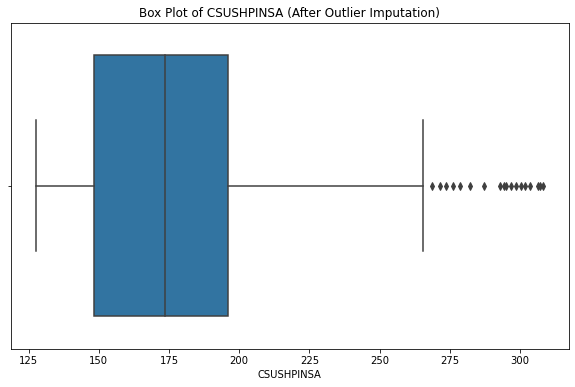

In [30]:
#Data Analysis after outlier Imputation
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} (After Outlier Imputation)')
    plt.show()

In [31]:
#converting categorical datas into numeric datas
def convert_to_categorical(df):
    for column in df.select_dtypes(exclude=['number']).columns:
        df[column] = df[column].astype('category')
    return df
df = convert_to_categorical(df)

In [32]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 9)

The dataset does not have duplicate values.

# Data Visualization

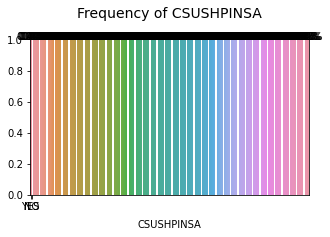

In [33]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Attrition
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='CSUSHPINSA', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('CSUSHPINSA', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['YES', 'NO'], size=10)
plt.title(f"Frequency of CSUSHPINSA", size=14, y=1.05);

,no.,%
PERMIT,,
1254,3,1.24
1094,2,0.83
2150,2,0.83
1338,2,0.83
1320,2,0.83
...,...,...
650,1,0.41
687,1,0.41
637,1,0.41


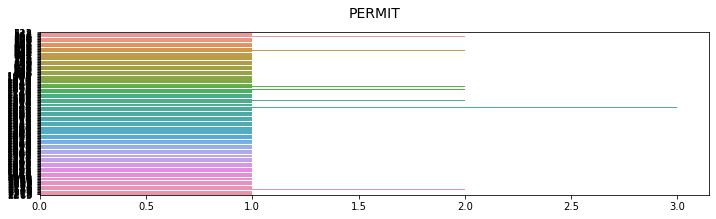

In [34]:
# Visualize the frequency of New Houses PERMIT
plt.figure(figsize=(12, 3))
ax = sns.countplot(y='PERMIT', data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"PERMIT", size=14, y=1.05)

house_permit = df.PERMIT.value_counts().to_frame("no.")
house_permit["%"] = round(df.PERMIT.value_counts(normalize=True) * 100, 2)
house_permit

# Plotting density plot for all the numerical features

In [36]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

In [37]:
# Correlation
df.corr()

,DATE,PERMIT,MSACSR,TLMFGCONS,UMCSENT,GDP,MSPUS,FEDFUNDS,CSUSHPINSA
DATE,1.000000,-0.127757,0.054781,0.900432,-0.034268,0.815081,0.799061,-0.163748,0.745779
PERMIT,-0.127757,1.000000,-0.383747,-0.124902,0.419985,-0.634450,-0.652623,0.454421,0.375310
MSACSR,0.054781,-0.383747,1.000000,0.205302,-0.497980,0.193526,0.190627,0.150747,0.206419
TLMFGCONS,0.900432,-0.124902,0.205302,1.000000,-0.122840,0.712520,0.703593,-0.076881,0.750548
UMCSENT,-0.034268,0.419985,-0.497980,-0.122840,1.000000,-0.203057,-0.203186,0.152222,-0.111947
GDP,0.815081,-0.634450,0.193526,0.712520,-0.203057,1.000000,0.990394,-0.412133,0.313883
MSPUS,0.799061,-0.652623,0.190627,0.703593,-0.203186,0.990394,1.000000,-0.456998,0.288878
FEDFUNDS,-0.163748,0.454421,0.150747,-0.076881,0.152222,-0.412133,-0.456998,1.000000,0.194547
CSUSHPINSA,0.745779,0.375310,0.206419,0.750548,-0.111947,0.313883,0.288878,0.194547,1.000000


In [38]:
df.describe()

,DATE,PERMIT,MSACSR,TLMFGCONS,UMCSENT,GDP,MSPUS,FEDFUNDS,CSUSHPINSA
count,241,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,2012-12-30 22:18:25.394190848,1309.535270,5.978423,57954.485477,82.296266,23642.166793,379260.165975,0.976639,181.126095
min,2003-01-01 00:00:00,513.000000,3.300000,19703.000000,50.000000,11174.129000,186000.000000,0.050000,127.652000
25%,2008-01-01 00:00:00,980.000000,4.800000,37489.000000,73.200000,20037.088000,318400.000000,0.120000,148.169000
50%,2013-01-01 00:00:00,1291.000000,5.600000,54884.000000,84.100000,26813.601000,429000.000000,0.400000,173.451000
75%,2018-01-01 00:00:00,1680.000000,6.800000,76513.000000,93.200000,26813.601000,429000.000000,1.550000,196.119000
max,2023-01-01 00:00:00,2263.000000,10.700000,133244.000000,103.800000,26813.601000,479500.000000,4.790000,308.298000
std,NaN,478.888896,1.729340,24068.169910,12.644193,5014.171112,80276.735878,1.183924,41.864691


# Key Observations:-

From the above satistical data of sevral parametrs,we observed that 
Permit (PERMIT):
Range: From 513 to 2263 permits.
Mean: Approximately 1309.54 permits.
Standard Deviation: Around 478.89 permits.
There is a noticeable variation in the number of permits issued.

MSACSR:
Range: Varies from 3.3% to 10.7%.
Mean: Approximately 5.98%.
Standard Deviation: About 1.73%.
Indicates variability in the Mortgage Credit Availability Index.

TLMFGCONS:
Range: From 19,703 to 133,244.
Mean: Around 57,954.49.
Standard Deviation: Approximately 24,068.17.
Shows a wide range in the total manufactured goods consumption.

UMCSENT:
Range: From 50 to 103.8.
Mean: Approximately 82.30.
Standard Deviation: About 12.64.
Indicates the Consumer Sentiment Index with a relatively large standard deviation.

GDP:
Range: From 11,174.13 to 26,813.60.
Mean: Approximately 23,642.17.
Standard Deviation: Around 5,014.17.
Reflects the Gross Domestic Product with a noticeable range.

MSPUS:
Range: From 186,000 to 479,500 dollars.
Mean: Approximately 379,260.17 dollars.
Standard Deviation: About 80,276.74 dollars.
Represents the Median Sales Price of Houses Sold.

FEDFUNDS:
Range: Varies from 0.05 to 4.79.
Mean: Approximately 0.98.
Standard Deviation: About 1.18.
Shows the Federal Funds Rate with a relatively large standard deviation.

CSUSHPINSA:
Range: From 127.65 to 308.30.
Mean: Approximately 181.13.
Standard Deviation: About 41.86.
Represents the Case-Shiller U.S. National Home Price NSA Index.

The dataset seems to cover various economic indicators, including housing, consumer sentiment, and financial variables.
The standard deviations for some variables are relatively large, indicating variability in the data.

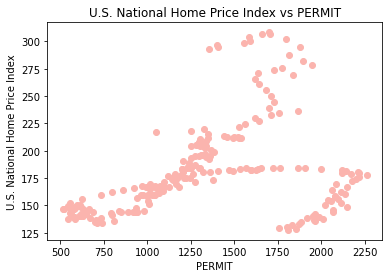

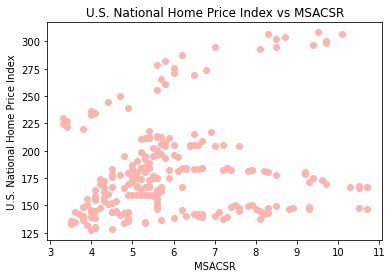

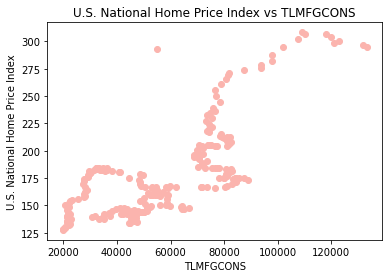

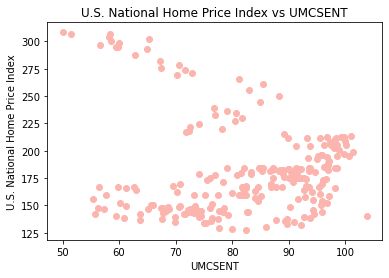

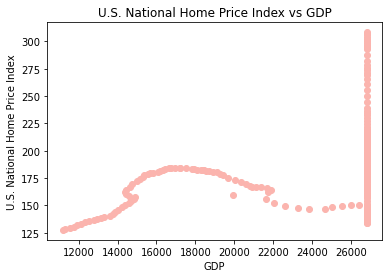

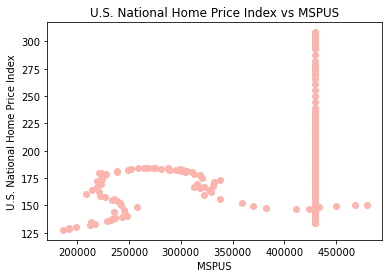

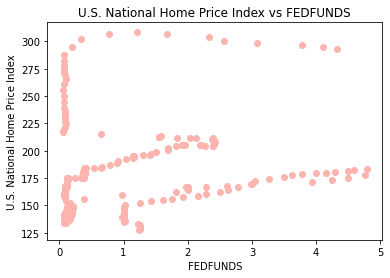

In [39]:
# Separating the target variable and the independent variable
x = df.drop(['DATE', 'CSUSHPINSA'], axis=1)
y = df['CSUSHPINSA']

# Plotting scatter plots of the U.S. National Home Price Index vs features
for feature in x.columns:
    plt.figure()
    plt.scatter(x = x[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("U.S. National Home Price Index")
    plt.title(f"U.S. National Home Price Index vs {feature}")

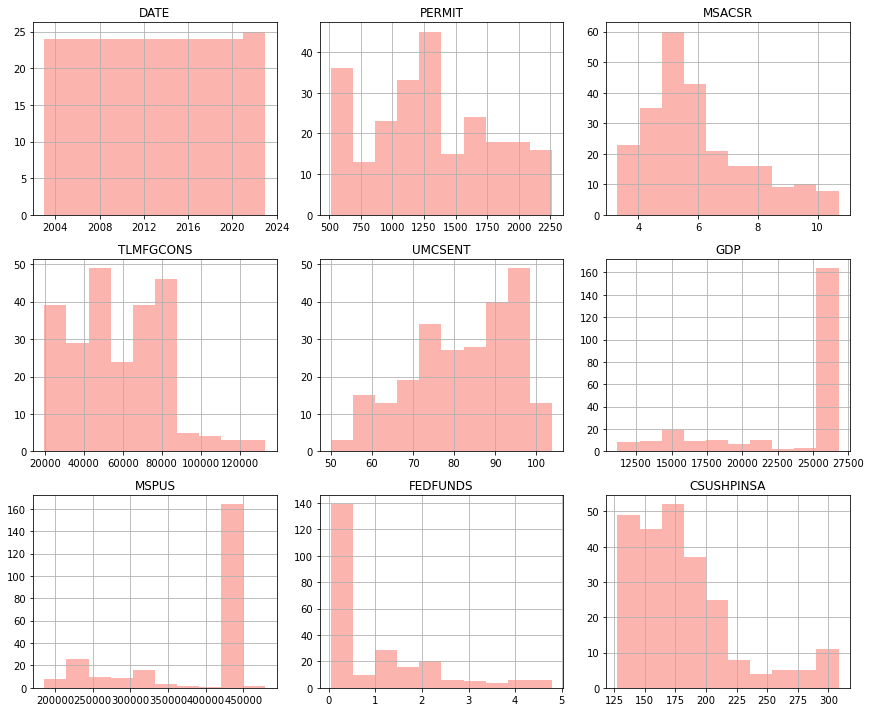

In [40]:
# Plot histograms for all columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


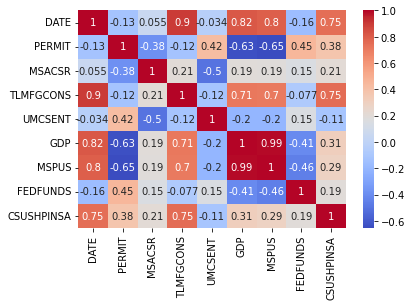

In [41]:
# Compute and display the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

GDP and MSPUS are highly correaleted with each other.

In [42]:
df

,DATE,PERMIT,MSACSR,TLMFGCONS,UMCSENT,GDP,MSPUS,FEDFUNDS,CSUSHPINSA
0,2003-01-01,1808,4.0,19703.0,82.4,11174.129,186000.0,1.24,127.652
1,2003-02-01,1854,4.5,19817.0,79.9,11312.766,191800.0,1.26,128.326
2,2003-03-01,1757,4.1,20772.0,77.6,11566.669,191900.0,1.25,129.308
3,2003-04-01,1803,4.1,20655.0,86.0,11772.234,198800.0,1.26,130.488
4,2003-05-01,1835,3.9,22157.0,92.1,11923.447,212700.0,1.26,131.839
...,...,...,...,...,...,...,...,...,...
236,2022-09-01,1588,9.7,122877.0,58.6,26813.601,429000.0,2.56,300.503
237,2022-10-01,1555,9.7,120839.0,59.9,26813.601,429000.0,3.08,298.731
238,2022-11-01,1402,9.4,131816.0,56.7,26813.601,429000.0,3.78,296.928
239,2022-12-01,1409,8.5,133244.0,59.8,26813.601,429000.0,4.10,294.417


In [43]:
y

0      127.652
1      128.326
2      129.308
3      130.488
4      131.839
        ...   
236    300.503
237    298.731
238    296.928
239    294.417
240    292.849
Name: CSUSHPINSA, Length: 241, dtype: float64

In [44]:
x

,PERMIT,MSACSR,TLMFGCONS,UMCSENT,GDP,MSPUS,FEDFUNDS
0,1808,4.0,19703.0,82.4,11174.129,186000.0,1.24
1,1854,4.5,19817.0,79.9,11312.766,191800.0,1.26
2,1757,4.1,20772.0,77.6,11566.669,191900.0,1.25
3,1803,4.1,20655.0,86.0,11772.234,198800.0,1.26
4,1835,3.9,22157.0,92.1,11923.447,212700.0,1.26
...,...,...,...,...,...,...,...
236,1588,9.7,122877.0,58.6,26813.601,429000.0,2.56
237,1555,9.7,120839.0,59.9,26813.601,429000.0,3.08
238,1402,9.4,131816.0,56.7,26813.601,429000.0,3.78
239,1409,8.5,133244.0,59.8,26813.601,429000.0,4.10


# Modael Evaluation

In [45]:
#importing important libraries for modeling 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(x_test)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 165.17
Coefficient of determination: 0.92


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)     

In [49]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=3)
lasso_cv_model.fit(x_train, y_train)
lasso_cv_predictions = lasso_cv_model.predict(x_test)

In [50]:
optimal_alpha = lasso_cv_model.alpha_
mse = mean_squared_error(y_test, lasso_cv_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_cv_predictions)

#printing the results
print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.2057
Mean Squared Error (MSE): 165.88
RMSE: 12.879465
R-squared (R2): 0.92


In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
cross_val_scores = cross_val_score(lasso_cv_model, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.90115261 0.93635678 0.91290053 0.93597661 0.83773845]


In [52]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

print(0.1 * rmse)
print(0.1 * df['CSUSHPINSA'].mean())

Mean R-squared: 0.9048
Standard Deviation of R-squared: 0.0362
1.2879465180424443
18.112609543568464


Interpretation:
The high mean R-squared value (0.9048) indicates that, on average, the model performs well in explaining the variation in the U.S. national home price index.
The low standard deviation of R-squared (0.0362) suggests that the model's performance is consistent across different instances or observations.

In [53]:
#displaying coefficients with features
lasso_coefficients = lasso_cv_model.coef_
feature_names = x.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})
non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]
non_zero_coefficients_df     

,Feature,Coefficient
0,PERMIT,38.876041
1,MSACSR,11.979492
2,TLMFGCONS,16.293697
3,UMCSENT,-9.082659
4,GDP,12.345752
5,MSPUS,8.505302
6,FEDFUNDS,0.175497


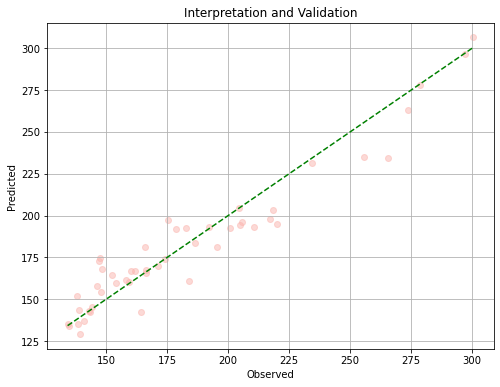

In [54]:
#plotting a graph for model's prediction and validation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Interpretation and Validation")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='GREEN', linestyle='--')

plt.show()

In [55]:
#performing hyperparameters tunning for searching the best parameter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [56]:
# Define the models and the hyperparameters to tune
models = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    }
}

In [57]:
# Performing hyperparameter tuning for each model
for name, model in models.items():
    clf = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error')
    clf.fit(x_train, y_train)
    
    print(f'{name} Regression:')
    print('Best parameters: ', clf.best_params_)
    print('Best score: ', clf.best_score_)
    print('---------------------------------------')

Ridge Regression:
Best parameters:  {'alpha': 1}
Best score:  -159.46142460361904
---------------------------------------
Lasso Regression:
Best parameters:  {'alpha': 0.1}
Best score:  -161.18719588141266
---------------------------------------


# *********************DONE******************